 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path
from itertools import product
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
# YOUR CODE HERE
whale_df = pd.read_csv(whale_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
# YOUR CODE HERE
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
# YOUR CODE HERE
whale_df = whale_df.dropna()
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
# YOUR CODE HERE
algo_df = pd.read_csv(algo_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_df

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [6]:
# Count nulls
# YOUR CODE HERE
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
# YOUR CODE HERE
algo_df = algo_df.dropna()
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
# YOUR CODE HERE
sp500_df = pd.read_csv(sp500_history_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_df = sp500_df.sort_index()
sp500_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [9]:
# Check Data Types
# YOUR CODE HERE
sp500_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
# YOUR CODE HERE
sp500_df['Close'] = [x.strip('$') for x in sp500_df.Close]
sp500_df['Close'] = sp500_df['Close'].astype(float)
sp500_df.dtypes

Close    float64
dtype: object

In [11]:
# Calculate Daily Returns
# YOUR CODE HERE
sp500_returns = sp500_df.pct_change()
sp500_returns

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [12]:
# Drop nulls
# YOUR CODE HERE
sp500_returns = sp500_returns.dropna()
sp500_returns.isnull().sum()
sp500_returns

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [13]:
# Rename Column
# YOUR CODE HERE
sp500_returns.columns = ['SP500']
sp500_returns.dtypes

SP500    float64
dtype: object

In [14]:
whale_df.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [15]:
algo_df.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

## Combine Whale, Algorithmic, and S&P 500 Returns

In [16]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
combined_df = pd.concat([whale_df, algo_df, sp500_returns], axis='columns', join='inner')
combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

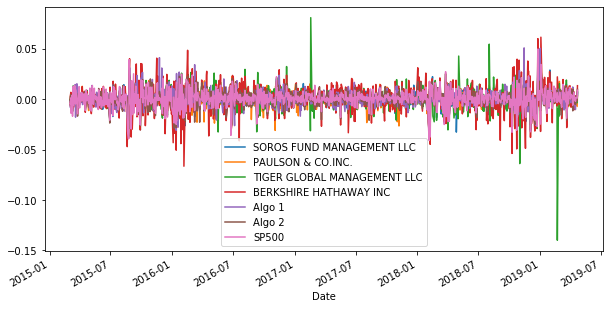

In [17]:
# Plot daily returns
# YOUR CODE HERE
combined_df.plot(figsize=(10,5))

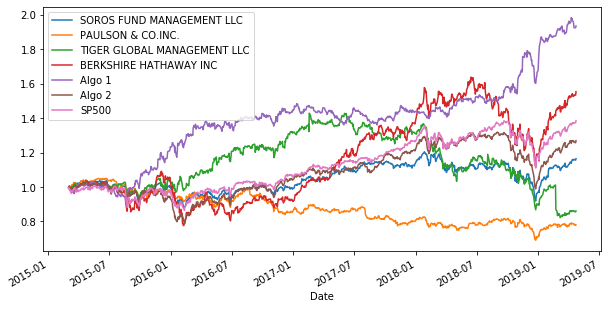

In [18]:
# Plot cumulative returns
# YOUR CODE HERE
cumulative_returns = (1 + combined_df).cumprod()
cumulative_returns.plot(figsize=(10,5))

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

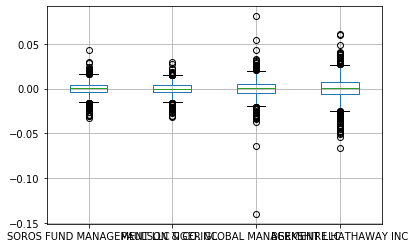

In [19]:
# Box plot to visually show risk
# YOUR CODE HERE
whale_df.boxplot()

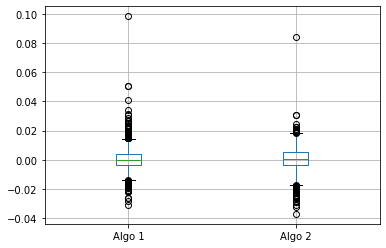

In [20]:
algo_df.boxplot()

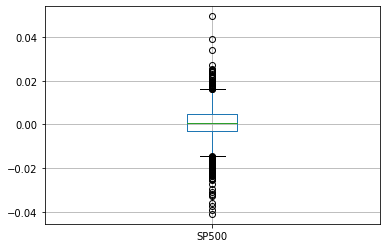

In [21]:
sp500_returns.boxplot()

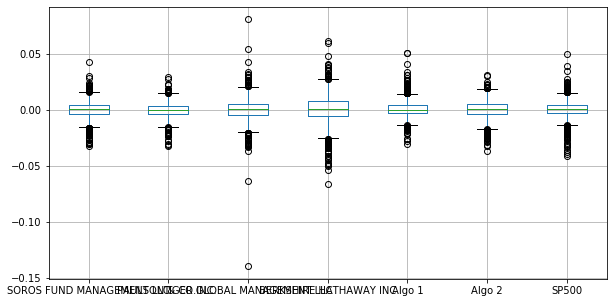

In [22]:
combined_df.boxplot(figsize=(10,5))

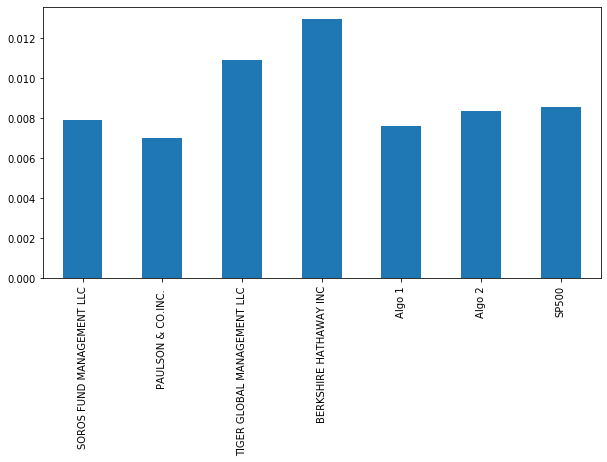

In [23]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
combined_std = combined_df.std()
combined_std.plot(kind='bar', figsize=(10,5))

In [24]:
print('TIGER GLOBAL MANAGEMENT LLC and BERKSHIRE HATHAWAY INC are riskier than the S&P500')

TIGER GLOBAL MANAGEMENT LLC and BERKSHIRE HATHAWAY INC are riskier than the S&P500


In [25]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE


In [26]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE


## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
2. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?

In [27]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
# YOUR CODE HERE
combined_rolling = combined_df.rolling(window=21).std()
combined_rolling = combined_rolling.dropna()
combined_rolling

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-31,0.005764,0.004641,0.006731,0.007108,0.007866,0.006867,0.009105
2015-04-01,0.005744,0.004467,0.006750,0.007005,0.007886,0.006894,0.009095
2015-04-02,0.005749,0.004502,0.006739,0.006958,0.007601,0.006955,0.009114
2015-04-06,0.005792,0.004492,0.006786,0.006884,0.007648,0.007028,0.009246
2015-04-07,0.005452,0.004385,0.006486,0.006193,0.007531,0.006530,0.008707
...,...,...,...,...,...,...,...
2019-04-16,0.006711,0.006224,0.007532,0.009731,0.005760,0.007053,0.006498
2019-04-17,0.006773,0.006370,0.007574,0.009485,0.006229,0.007165,0.006537
2019-04-18,0.006633,0.006303,0.007328,0.009475,0.005834,0.007172,0.006470


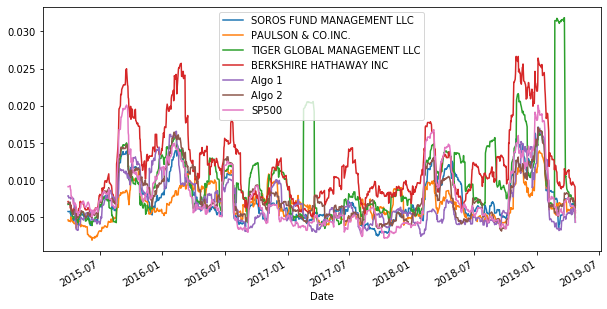

In [28]:
combined_rolling.plot(figsize=(10,5))

In [29]:
print('The Tiger Global deviation did not follow the other porfilios.')

The Tiger Global deviation did not follow the other porfilios.


In [30]:
# Construct a correlation table
# YOUR CODE HERE
combined_correlation = combined_df.corr()
combined_correlation.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494


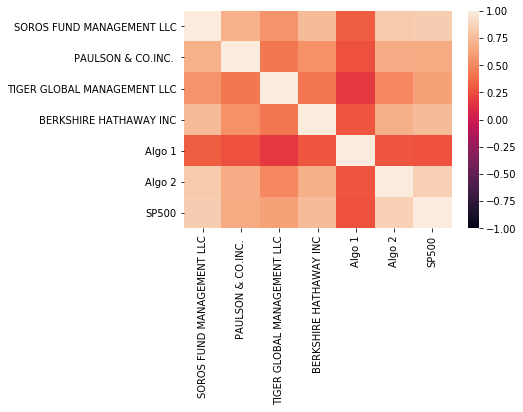

In [31]:
sns.heatmap(combined_correlation, vmin=-1, vmax=1)

In [32]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
# YOUR CODE HERE
#Covariance of Algo1
covariance_algo1 = combined_df['Algo 1'].cov(combined_df['SP500'])

#Variance of Algo1
variance_algo1 = combined_df['Algo 1'].var()

#Beta of Algo1
beta_algo1 = covariance_algo1 / variance_algo1
beta_algo1


0.313734135114606

In [33]:
#Covariance of Algo2
covariance_algo2 = combined_df['Algo 2'].cov(combined_df['SP500'])

#Variance of Algo2
variance_algo2 = combined_df['Algo 2'].var()

#Beta of Algo2
beta_algo2 = covariance_algo2 / variance_algo2
beta_algo2

0.8805317114601035

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

In [34]:
# (OPTIONAL) YOUR CODE HERE


---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [35]:
# Annualized Sharpe Ratios
# YOUR CODE HERE 
sharpe_combined = combined_df.mean() / combined_df.std()
sharpe_combined

SOROS FUND MANAGEMENT LLC      0.022452
PAULSON & CO.INC.             -0.030462
TIGER GLOBAL MANAGEMENT LLC   -0.007626
BERKSHIRE HATHAWAY INC         0.039170
Algo 1                         0.086847
Algo 2                         0.031583
SP500                          0.040837
dtype: float64

In [36]:
sharpe_annualized =  sharpe_combined * (252**.5)
sharpe_annualized

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
SP500                          0.648267
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

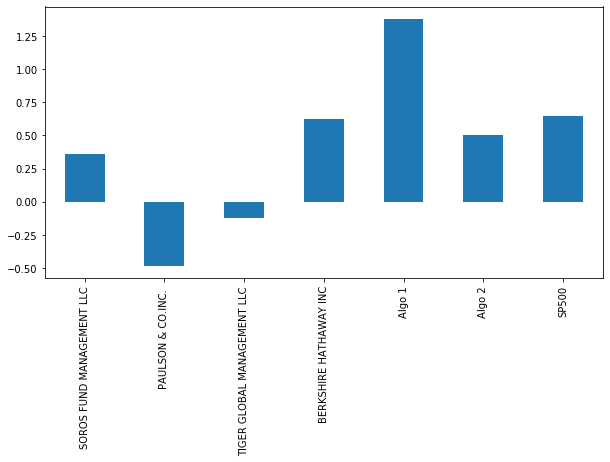

In [37]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_annualized.plot(kind='bar', figsize=(10,5))

In [38]:
print('Algo 1 vastly outperforms all porfolios, but Algo 2 underperforms the market and BERKSHIRE')

Algo 1 vastly outperforms all porfolios, but Algo 2 underperforms the market and BERKSHIRE


---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [62]:
# Read the first stock
# YOUR CODE HERE
att_csv = Path("Resources/ATT.csv")
att_df = pd.read_csv(att_csv, date_format = '%Y%m%d', index_col="Date", parse_dates=True, infer_datetime_format=True)
att_df.head()

TypeError: parser_f() got an unexpected keyword argument 'data_format'

In [61]:
att_csv = Path("Resources/ATT.csv")
att_df = pd.read_csv(att_csv)
att_df = att_df.(date_format= ''%Y%m%d')
att_df.head()

SyntaxError: invalid syntax (<ipython-input-61-d0e7845dabfc>, line 3)

In [40]:
# Read the second stock
# YOUR CODE HERE
vz_csv = Path("Resources/vz.csv")
vz_df = pd.read_csv(vz_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
vz_df.head()

,Close
Date,
2015-05-15 16:00:00,49.79
2015-05-18 16:00:00,49.60
2015-05-19 16:00:00,49.55
2015-05-20 16:00:00,49.69
2015-05-21 16:00:00,49.90


In [41]:
# Read the third stock
# YOUR CODE HERE
tmus_csv = Path("Resources/TMUS.csv")
tmus_df = pd.read_csv(tmus_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
tmus_df.head()

,Close
Date,
2015-05-15 16:00:00,34.40
2015-05-18 16:00:00,34.83
2015-05-19 16:00:00,34.40
2015-05-20 16:00:00,35.21
2015-05-21 16:00:00,36.25


In [58]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
telecomm_df = pd.concat([att_df, vz_df, tmus_df], axis='columns', join='inner')
telecomm_df.columns = ['AT&T', 'Verizon', 'T-Mobile']
telecomm_df = telecomm_df['Date'].normalize()

KeyError: 'Date'

In [43]:
# Reset the index
# YOUR CODE HERE
#Done above

In [44]:
# Pivot so that each column of prices represents a unique symbol
# YOUR CODE HERE
telecomm_pivot = telecomm_df.pivot
telecomm_pivot

<bound method DataFrame.pivot of                       AT&T  Verizon  T-Mobile
Date                                         
2015-05-15 16:00:00  34.33    49.79     34.40
2015-05-18 16:00:00  34.87    49.60     34.83
2015-05-19 16:00:00  34.37    49.55     34.40
2015-05-20 16:00:00  34.62    49.69     35.21
2015-05-21 16:00:00  35.07    49.90     36.25
...                    ...      ...       ...
2020-05-08 16:00:00  29.79    57.00     98.52
2020-05-11 16:00:00  29.38    56.40     96.72
2020-05-12 16:00:00  28.89    55.46     94.61
2020-05-13 16:00:00  28.09    54.85     92.78
2020-05-14 16:00:00  28.58    54.91     94.91

[1258 rows x 3 columns]>

In [45]:
# Drop Nulls
# YOUR CODE HERE
telecomm_df = telecomm_df.dropna()
telecomm_df.isnull().sum()

AT&T        0
Verizon     0
T-Mobile    0
dtype: int64

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [46]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE
telecomm_returns = telecomm_df.pct_change()
telecomm_returns.head()

,AT&T,Verizon,T-Mobile
Date,,,
2015-05-15 16:00:00,NaN,NaN,NaN
2015-05-18 16:00:00,0.015730,-0.003816,0.012500
2015-05-19 16:00:00,-0.014339,-0.001008,-0.012346
2015-05-20 16:00:00,0.007274,0.002825,0.023547
2015-05-21 16:00:00,0.012998,0.004226,0.029537


In [47]:
telecomm_returns = telecomm_returns.dropna()
telecomm_returns.isnull().sum()

AT&T        0
Verizon     0
T-Mobile    0
dtype: int64

In [48]:
telecomm_portfolio = telecomm_returns.dot(weights)
telecomm_portfolio.head()

Date
2015-05-18 16:00:00    0.008138
2015-05-19 16:00:00   -0.009231
2015-05-20 16:00:00    0.011215
2015-05-21 16:00:00    0.015587
2015-05-22 16:00:00   -0.001405
dtype: float64

In [49]:
# telecomm_cumulative = (1 + telecomm_portfolio).cumprod()
# telecomm_cumulative

## Join your custom portfolio returns to the DataFrame that contains all of the portfolio returns

In [50]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
# YOUR CODE HERE
all_combined_df = pd.concat([telecomm_portfolio, whale_df, algo_df, sp500_returns], axis='columns', join='inner')
all_combined_df

,0,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,,


In [51]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [52]:
# Risk
# YOUR CODE HERE


In [53]:
# Rolling
# YOUR CODE HERE


In [54]:
# Beta
# YOUR CODE HERE


In [55]:
# Annualized Sharpe Ratios
# YOUR CODE HERE


In [56]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE


## Include correlation analysis to determine which stocks (if any) are correlated

In [57]:
# YOUR CODE HERE
correlation_mean = correlation_combined.mean()
correlation_mean

NameError: name 'correlation_combined' is not defined

In [ ]:
correlation_std = correlation_combined.std()
correlation_std